# Finance Data Project

**In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.**

**We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.**

## Data

**In this section we will learn how to use pandas to directly read data from Yoogle Finance using pandas.**

**The imports:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

from pandas_datareader import data, wb
import datetime

**We will get stock information for the following banks:**
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)

# CitiGroup
C = data.DataReader('C', 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**We'll concatenate the bank dataframes together to a single data frame called bank_stocks. Then we'll set the keys argument equal to the tickers list. Also we need to pay attention to the axis along which the data will be concatenated:**

In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

**Setting the column name levels:**

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Checking the head of the bank_stocks dataframe.**

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584064  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227398  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270206  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220276  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241650  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558952  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583355  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680923  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717529  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095604  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242825  
2006-01-04   31.799999  31.530001  10870000.0  20.008032  
2006-01-05   31.500000  31.495001  10158000.0  19.985815  
2006-01-06   31.580000  31.680000   8403800.0  20.103220  
2006-01-09   31.674999  31.674999   5619600.0  20.100040  

[5 rows x 36 columns]

# Exploratory Data Analysis (EDA):

**Let's explore the data a bit**

**What is the maximum Close Price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Let's create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. Returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close Column to create a column representing this return value:**

In [10]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Let's check which stock stands out using pairplot.**

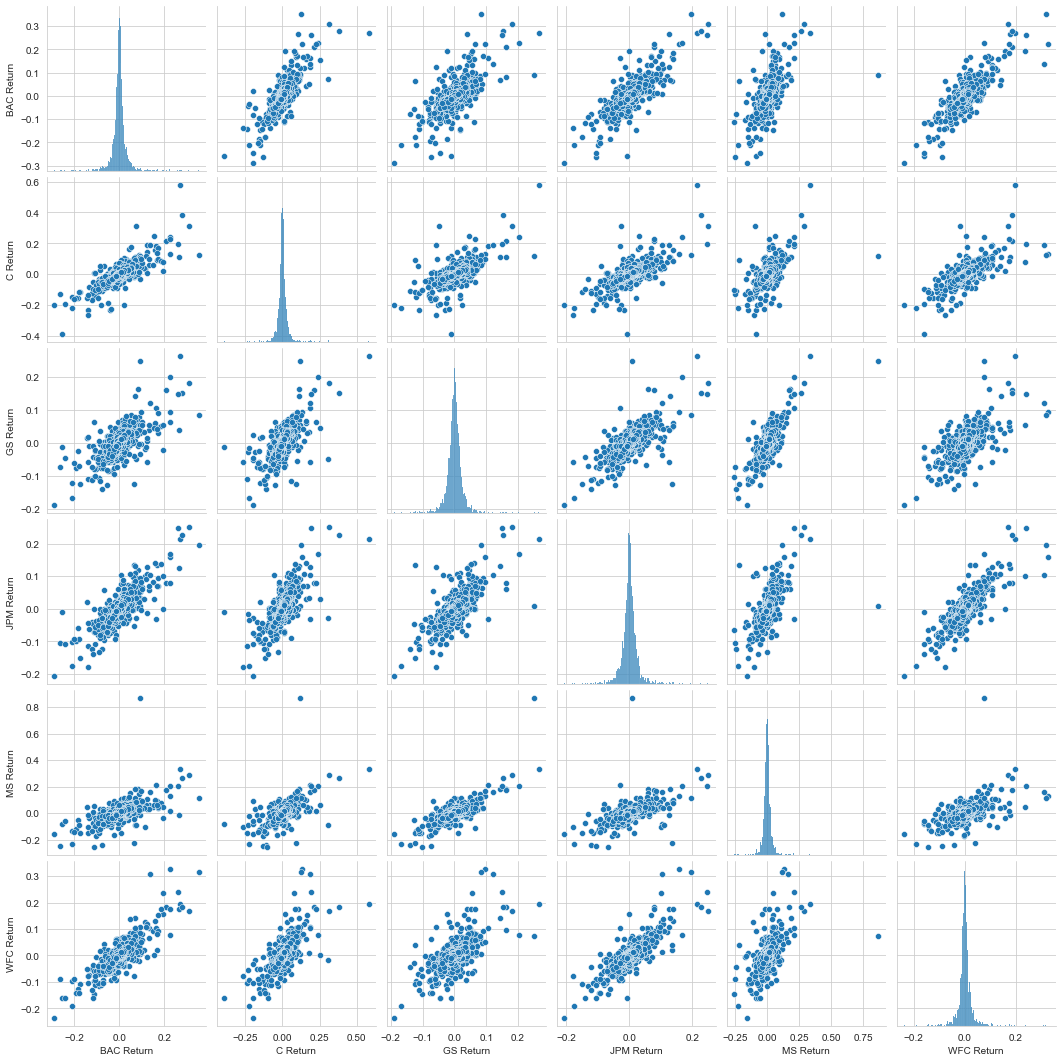

In [11]:
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

**You'll also see the enormous crash in value if you take a look at the stock price plot (which we do later in the visualizations).**

**Using this returns DataFrame, let's try to figure out on which dates each bank stock had the best and worst single day returns.**

In [12]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**We should notice that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?**

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [13]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**We can see that the biggest gain as well as the biggest loss was experienced during the inaugural ceremony of Barack Obama which is interesting.**

**After taking a look at the standard deviation of the returns, we can classify as the riskiest investments over the entire time period.**

In [15]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

**CitiGroup is the riskiest.**

**For the year 2015 the riskiest investments would be:**

In [17]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Morgan Stanley or Bank of America**

**2015 returns for Morgan Stanley:**

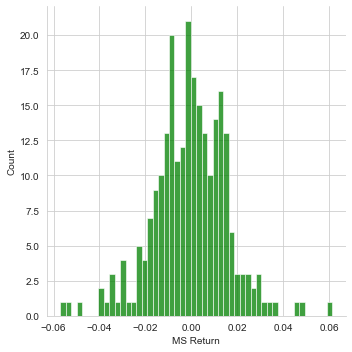

In [21]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=50)

**2008 returns for CitiGroup:**

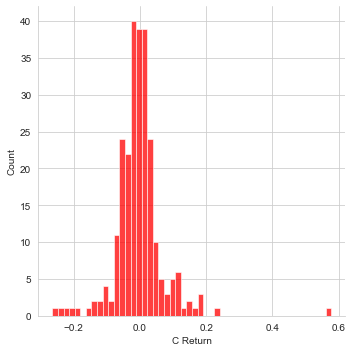

In [23]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=50)

**Close Price for each bank for the entire index of time:**

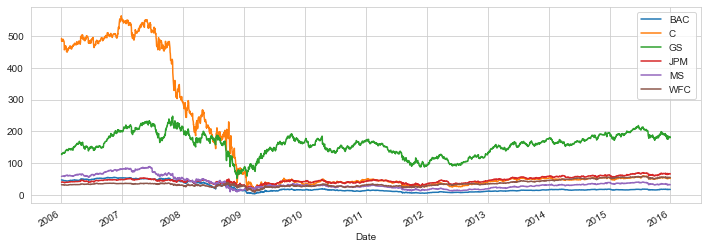

In [24]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

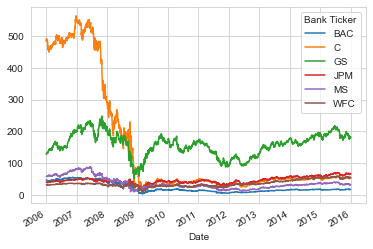

In [25]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [26]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

**Let's analyze the moving averages for these stocks in the year 2008.**

**Rolling 30 day average against the Close Price for Bank of America's stock for the year 2008:**

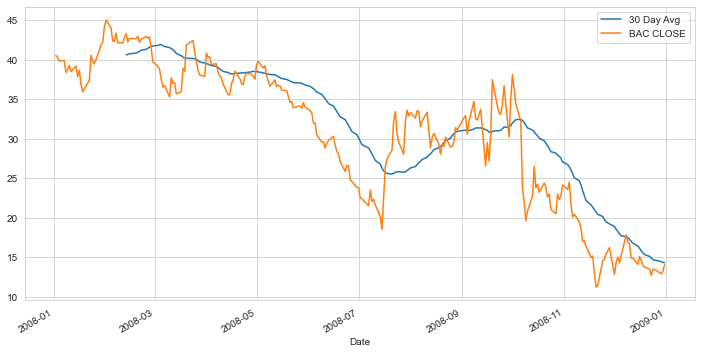

In [27]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Heatmap of the correlation between the stocks Close Price:**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

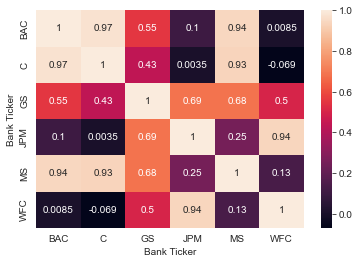

In [28]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Let's use seaborn's clustermap to cluster the correlations together:**

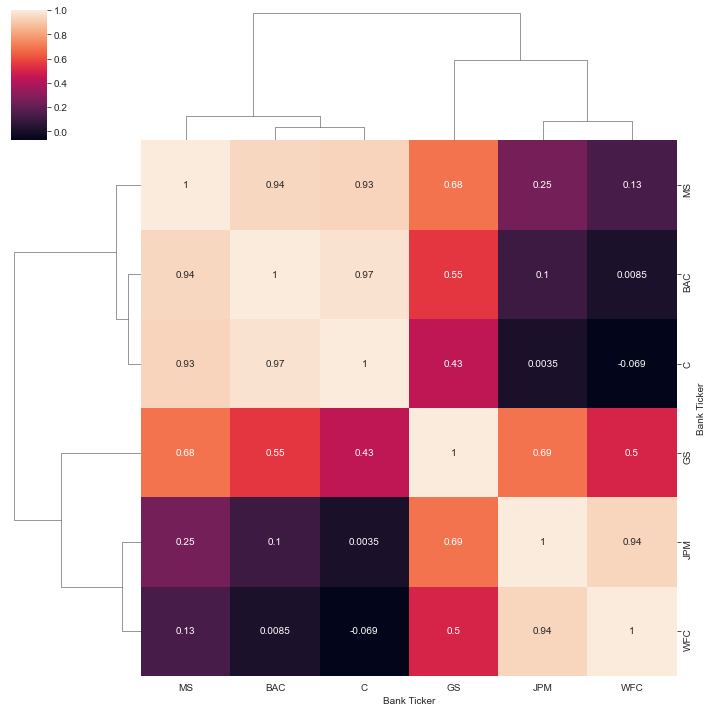

In [29]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [30]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

**Now we will rely on the cufflinks library to create some Technical Analysis plots.**

**Candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016:**

In [32]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Simple Moving Averages plot of Morgan Stanley for the year 2015:**

In [34]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Bollinger Band Plot for Bank of America for the year 2015:**

In [35]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

**Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.**